In [15]:
import numpy as np
import pandas as pd

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm

import scipy.stats

In [16]:
df = pd.read_csv('./pitching_data_1996_2019.csv')
df.head()

starters = df[df["GS"] >= 3]

In [17]:
#group by player age
starters_age = starters[['Age', 'G', 'GS', 'IP', 'W', 'L', 'ER', 'SV', 'SO', 'WHIP', 'BB', 'H', 'HR']].groupby(['Age'], as_index=False).sum()
starters_age['W_PER_G'] = starters_age['W'] / starters_age['G']
starters_age['L_PER_G'] = starters_age['L'] / starters_age['G']
starters_age['SO_PER_G'] = starters_age['SO'] / starters_age['G']
starters_age['AVG_ERA'] = 9 * (starters_age['ER'] / starters_age['IP'])
starters_age['AVG_WHIP'] = (starters_age['BB'] + starters_age['H']) / starters_age['IP']
starters_age['IP_PER_G'] = starters_age['IP'] / starters_age['G']
starters_age['HR_PER_G'] = starters_age['HR'] / starters_age['G']

starters_age['DELTA_W_PER_G'] = 0.0
starters_age['PREV_W_PER_G'] = 0.0
starters_age['W_PER_G_PERCENT_CHANGE'] = 0.0

starters_age['DELTA_L_PER_G'] = 0.0
starters_age['PREV_L_PER_G'] = 0.0
starters_age['L_PER_G_PERCENT_CHANGE'] = 0.0

starters_age['DELTA_SO_PER_G'] = 0.0
starters_age['PREV_SO_PER_G'] = 0.0
starters_age['SO_PER_G_PERCENT_CHANGE'] = 0.0

starters_age['DELTA_ERA'] = 0.0
starters_age['PREV_ERA'] = 0.0
starters_age['ERA_PERCENT_CHANGE'] = 0.0

starters_age['DELTA_WHIP'] = 0.0
starters_age['PREV_WHIP'] = 0.0
starters_age['WHIP_PERCENT_CHANGE'] = 0.0

starters_age['DELTA_IP_PER_G'] = 0.0
starters_age['PREV_IP_PER_G'] = 0.0
starters_age['IP_PER_G_PERCENT_CHANGE'] = 0.0

starters_age['DELTA_IP_PER_G'] = 0.0
starters_age['PREV_IP_PER_G'] = 0.0
starters_age['IP_PER_G_PERCENT_CHANGE'] = 0.0

starters_age['DELTA_IP_PER_G'] = 0.0
starters_age['PREV_IP_PER_G'] = 0.0
starters_age['IP_PER_G_PERCENT_CHANGE'] = 0.0

starters_age['DELTA_HR_PER_G'] = 0.0
starters_age['PREV_HR_PER_G'] = 0.0
starters_age['HR_PER_G_PERCENT_CHANGE'] = 0.0

In [18]:
for i, r in starters_age.iterrows():
    if i != 0:
        starters_age.at[i,'DELTA_W_PER_G'] = starters_age.at[i,'W_PER_G'] - starters_age.at[i-1,'W_PER_G']
        starters_age.at[i,'PREV_W_PER_G'] = starters_age.at[i-1,'W_PER_G']
        starters_age.at[i,'W_PER_G_PERCENT_CHANGE'] = starters_age.at[i,'DELTA_W_PER_G']/starters_age.at[i,'PREV_W_PER_G']
        
        starters_age.at[i,'DELTA_L_PER_G'] = starters_age.at[i,'L_PER_G'] - starters_age.at[i-1,'L_PER_G']
        starters_age.at[i,'PREV_L_PER_G'] = starters_age.at[i-1,'L_PER_G']
        starters_age.at[i,'L_PER_G_PERCENT_CHANGE'] = starters_age.at[i,'DELTA_L_PER_G']/starters_age.at[i,'PREV_L_PER_G']
        
        starters_age.at[i,'DELTA_SO_PER_G'] = starters_age.at[i,'SO_PER_G'] - starters_age.at[i-1,'SO_PER_G']
        starters_age.at[i,'PREV_SO_PER_G'] = starters_age.at[i-1,'SO_PER_G']
        starters_age.at[i,'SO_PER_G_PERCENT_CHANGE'] = starters_age.at[i,'DELTA_SO_PER_G']/starters_age.at[i,'PREV_SO_PER_G']
        
        starters_age.at[i,'DELTA_ERA'] = starters_age.at[i,'AVG_ERA'] - starters_age.at[i-1,'AVG_ERA']
        starters_age.at[i,'PREV_ERA'] = starters_age.at[i-1,'AVG_ERA']
        starters_age.at[i,'ERA_PERCENT_CHANGE'] = starters_age.at[i,'DELTA_ERA']/starters_age.at[i,'PREV_ERA']
        
        starters_age.at[i,'DELTA_WHIP'] = starters_age.at[i,'AVG_WHIP'] - starters_age.at[i-1,'AVG_WHIP']
        starters_age.at[i,'PREV_WHIP'] = starters_age.at[i-1,'AVG_WHIP']
        starters_age.at[i,'WHIP_PERCENT_CHANGE'] = starters_age.at[i,'DELTA_WHIP']/starters_age.at[i,'PREV_WHIP']
        
        starters_age.at[i,'DELTA_HR_PER_G'] = starters_age.at[i,'HR_PER_G'] - starters_age.at[i-1,'HR_PER_G']
        starters_age.at[i,'PREV_HR_PER_G'] = starters_age.at[i-1,'HR_PER_G']
        starters_age.at[i,'HR_PER_G_PERCENT_CHANGE'] = starters_age.at[i,'DELTA_HR_PER_G']/starters_age.at[i,'PREV_HR_PER_G']

        starters_age.at[i,'DELTA_IP_PER_G'] = starters_age.at[i,'IP_PER_G'] - starters_age.at[i-1,'IP_PER_G']
        starters_age.at[i,'PREV_IP_PER_G'] = starters_age.at[i-1,'IP_PER_G']
        starters_age.at[i,'IP_PER_G_PERCENT_CHANGE'] = starters_age.at[i,'DELTA_IP_PER_G']/starters_age.at[i,'PREV_IP_PER_G']
        
starters_age.head()

,Age,G,GS,IP,W,L,ER,SV,SO,WHIP,...,ERA_PERCENT_CHANGE,DELTA_WHIP,PREV_WHIP,WHIP_PERCENT_CHANGE,DELTA_IP_PER_G,PREV_IP_PER_G,IP_PER_G_PERCENT_CHANGE,DELTA_HR_PER_G,PREV_HR_PER_G,HR_PER_G_PERCENT_CHANGE
0,19,43,35,216.1,11,8,72,1,219,4.93,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,20,457,384,2246.3,135,137,1071,0,1806,38.04,...,0.431014,0.143700,1.221657,0.117627,-0.110264,5.025581,-0.021941,0.287110,0.325581,0.881838
2,21,1737,1421,8369.0,471,529,4243,7,6592,159.40,...,0.063354,0.058111,1.365356,0.042561,-0.097240,4.915317,-0.019783,-0.024896,0.612691,-0.040635
3,22,4607,3878,23090.6,1379,1411,11568,13,17570,383.26,...,-0.011848,-0.017138,1.423468,-0.012039,0.193991,4.818077,0.040263,0.024100,0.587795,0.041001
4,23,9343,7390,45064.3,2555,2738,22491,39,35071,698.00,...,-0.003785,0.001303,1.406330,0.000927,-0.188746,5.012069,-0.037658,-0.019045,0.611895,-0.031124


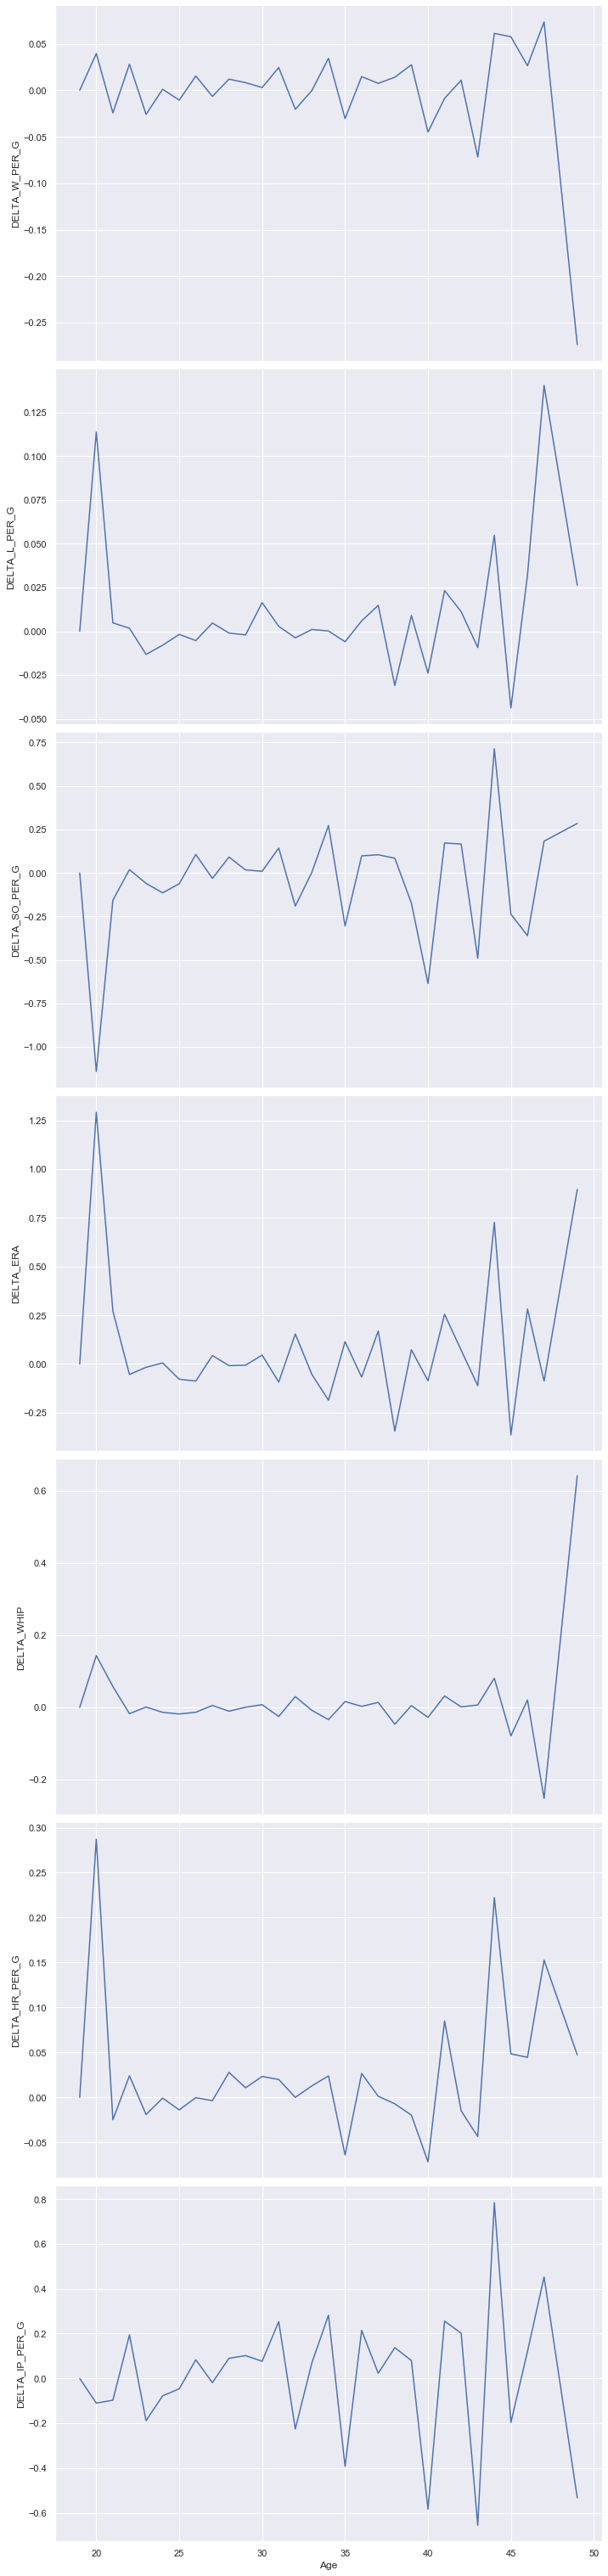

In [19]:
# explore delta of avg by age 
g = sns.PairGrid(starters_age, y_vars=["DELTA_W_PER_G", 
                                       "DELTA_L_PER_G",
                                       "DELTA_SO_PER_G",
                                       "DELTA_ERA",
                                       "DELTA_WHIP",
                                      "DELTA_HR_PER_G",
                                      "DELTA_IP_PER_G"], x_vars=["Age"], height=6, aspect = 1.6)
g.map(sns.lineplot, markers=True)

In [20]:
# explore percent change by age and previous season's stat
df2 = starters[['key_mlbam', 'Age', 'G', 'GS', 'IP', 'W', 'L', 'HR', 'ERA', 'ER', 'SV', 'SO', 'WHIP', 'BB', 'H']]
df2['W_PER_G'] = df2['W'] / df2['G']
df2['L_PER_G'] = df2['L'] / df2['G']
df2['HR_PER_G'] = df2['HR'] / df2['G']
df2['SO_PER_G'] = df2['SO'] / df2['G']
df2['IP_PER_G'] = df2['IP'] / df2['G']

df2['DELTA_W_PER_G'] = float("NaN")
df2['PREV_W_PER_G'] = float("NaN")
df2['W_PER_G_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_L_PER_G'] = float("NaN")
df2['PREV_L_PER_G'] = float("NaN")
df2['L_PER_G_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_SO_PER_G'] = float("NaN")
df2['PREV_SO_PER_G'] = float("NaN")
df2['SO_PER_G_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_ERA'] = float("NaN")
df2['PREV_ERA'] = float("NaN")
df2['ERA_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_WHIP'] = float("NaN")
df2['PREV_WHIP'] = float("NaN")
df2['WHIP_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_HR_PER_G'] = float("NaN")
df2['PREV_HR_PER_G'] = float("NaN")
df2['HR_PER_G_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_IP_PER_G'] = float("NaN")
df2['PREV_IP_PER_G'] = float("NaN")
df2['IP_PER_G_PERCENT_CHANGE'] = float("NaN")

for i, r in df2.iterrows():
    prev = df2[ (df2.key_mlbam==r.key_mlbam) & (df2['Age']==(r['Age']-1)) ]

    if len(prev)==1:
        df2.at[i,'DELTA_W_PER_G'] = r.W_PER_G - prev.W_PER_G
        df2.at[i,'PREV_W_PER_G'] = prev.W_PER_G
        df2.at[i,'W_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_W_PER_G']/df2.at[i,'PREV_W_PER_G']
        
        df2.at[i,'DELTA_L_PER_G'] = r.L_PER_G - prev.L_PER_G
        df2.at[i,'PREV_L_PER_G'] = prev.L_PER_G
        df2.at[i,'L_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_L_PER_G']/df2.at[i,'PREV_L_PER_G']
        
        df2.at[i,'DELTA_SO_PER_G'] = r.SO_PER_G - prev.SO_PER_G
        df2.at[i,'PREV_SO_PER_G'] = prev.SO_PER_G
        df2.at[i,'SO_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_SO_PER_G']/df2.at[i,'PREV_SO_PER_G']
        
        df2.at[i,'DELTA_ERA'] = r.ERA - prev.ERA
        df2.at[i,'PREV_ERA'] = prev.ERA
        df2.at[i,'ERA_PERCENT_CHANGE'] = df2.at[i,'DELTA_ERA']/df2.at[i,'PREV_ERA']
        
        df2.at[i,'DELTA_WHIP'] = r.WHIP - prev.WHIP
        df2.at[i,'PREV_WHIP'] = prev.WHIP
        df2.at[i,'WHIP_PERCENT_CHANGE'] = df2.at[i,'DELTA_WHIP']/df2.at[i,'PREV_WHIP']
        
        df2.at[i,'DELTA_IP_PER_G'] = r.IP_PER_G - prev.IP_PER_G
        df2.at[i,'PREV_IP_PER_G'] = prev.IP_PER_G
        df2.at[i,'IP_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_IP_PER_G']/df2.at[i,'PREV_IP_PER_G']
        
        df2.at[i,'DELTA_HR_PER_G'] = r.HR_PER_G - prev.HR_PER_G
        df2.at[i,'PREV_HR_PER_G'] = prev.HR_PER_G
        df2.at[i,'HR_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_HR_PER_G']/df2.at[i,'PREV_HR_PER_G']

# remove any rows where we dont have previous season data...ex: a player's first season
df2.dropna(axis=0, how='any', inplace=True)
df2.head()

/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is tr

/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in double_scalars
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in double_scalars
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,key_mlbam,Age,G,GS,IP,W,L,HR,ERA,ER,...,ERA_PERCENT_CHANGE,DELTA_WHIP,PREV_WHIP,WHIP_PERCENT_CHANGE,DELTA_HR_PER_G,PREV_HR_PER_G,HR_PER_G_PERCENT_CHANGE,DELTA_IP_PER_G,PREV_IP_PER_G,IP_PER_G_PERCENT_CHANGE
0,118377,27,31,29,213.1,23,4,9,2.07,49,...,-0.283737,-0.17,1.09,-0.155963,-0.497556,0.787879,-0.631514,-0.192473,7.066667,-0.027237
1,112388,34,34,34,264.0,21,7,9,2.05,60,...,-0.435262,-0.30,1.33,-0.225564,-0.294118,0.558824,-0.526316,0.641176,7.123529,0.090008
2,116615,37,35,34,249.2,21,6,19,2.49,69,...,-0.056818,-0.11,1.12,-0.098214,-0.114286,0.657143,-0.173913,0.028571,7.091429,0.004029
3,116615,36,35,35,248.2,19,7,23,2.64,73,...,0.064516,0.10,1.02,0.098039,-0.200000,0.857143,-0.233333,-0.657143,7.748571,-0.084808
4,111554,33,36,35,257.0,18,7,8,2.38,68,...,-0.115242,-0.11,1.18,-0.093220,-0.080808,0.303030,-0.266667,-0.045960,7.184848,-0.006397


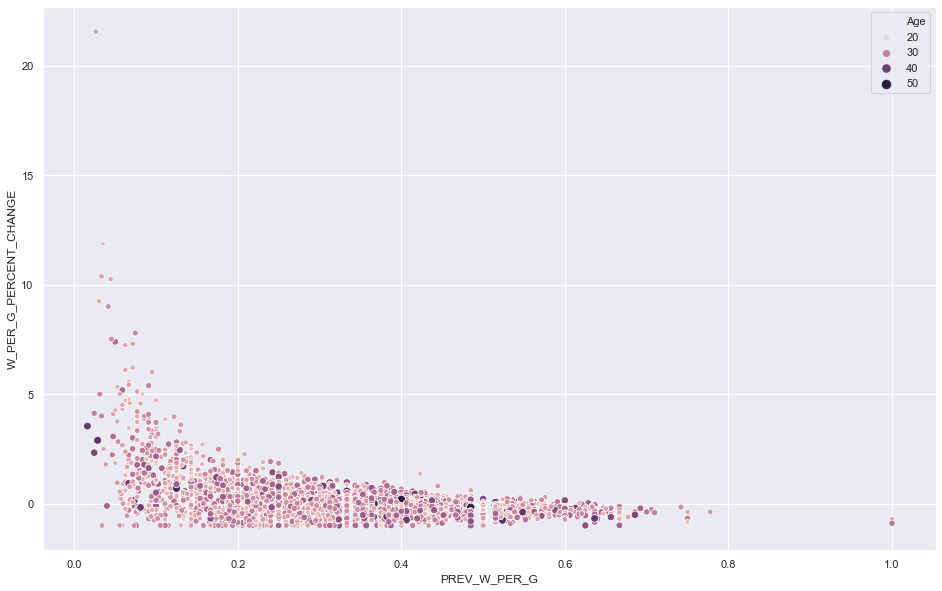

In [21]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_W_PER_G", y="W_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')


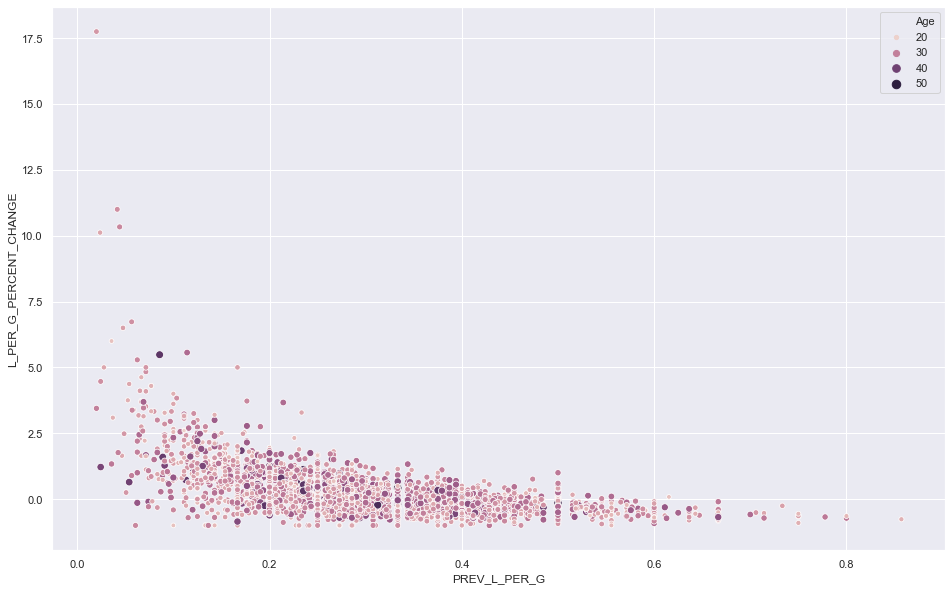

In [22]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_L_PER_G", y="L_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')

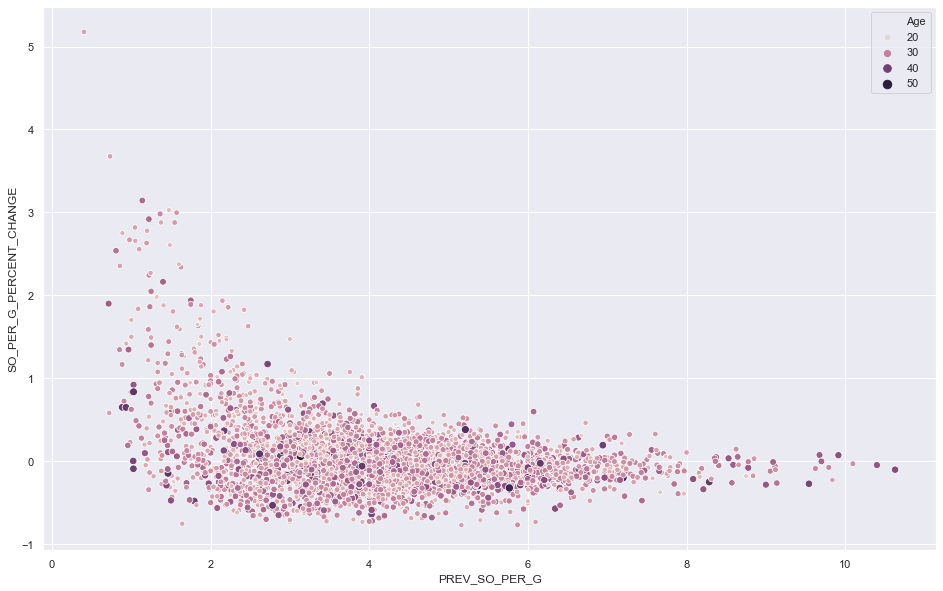

In [23]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_SO_PER_G", y="SO_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')


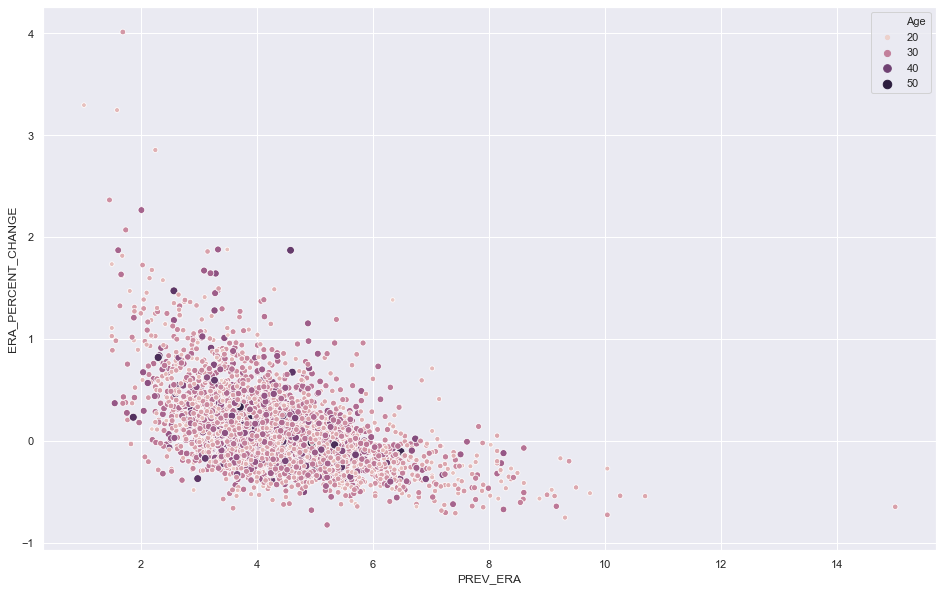

In [24]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_ERA", y="ERA_PERCENT_CHANGE", data=df2, size='Age', hue='Age')


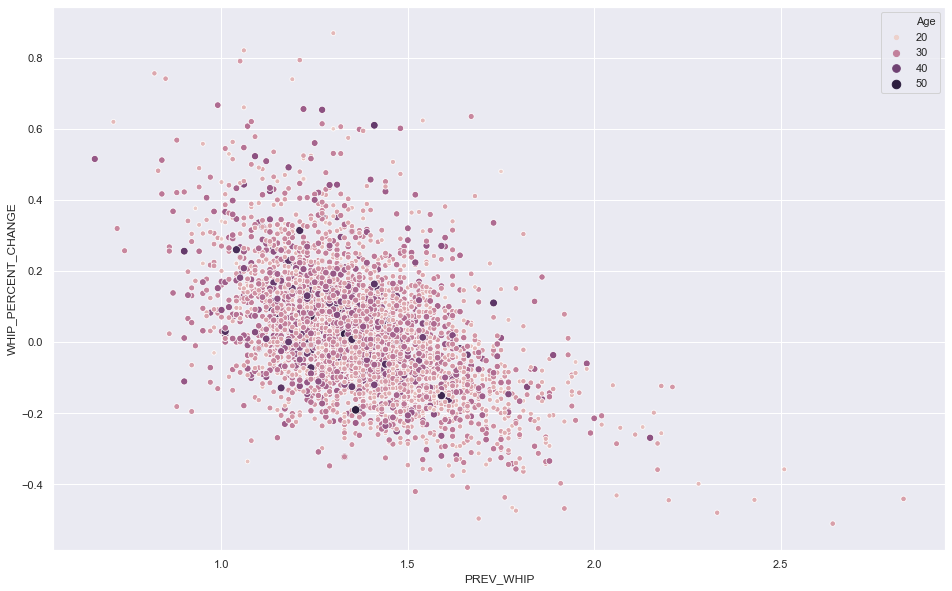

In [25]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_WHIP", y="WHIP_PERCENT_CHANGE", data=df2, size='Age', hue='Age')


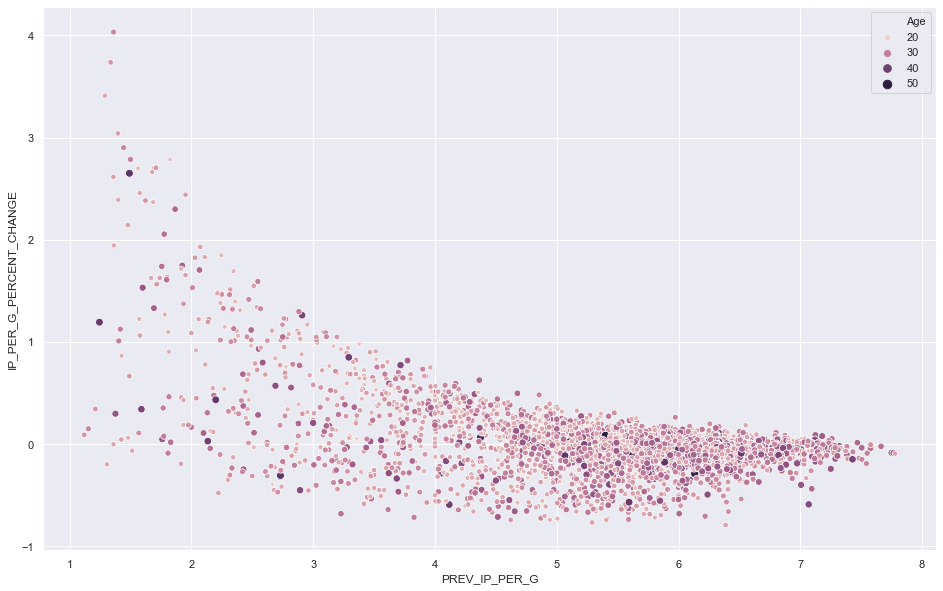

In [26]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_IP_PER_G", y="IP_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')

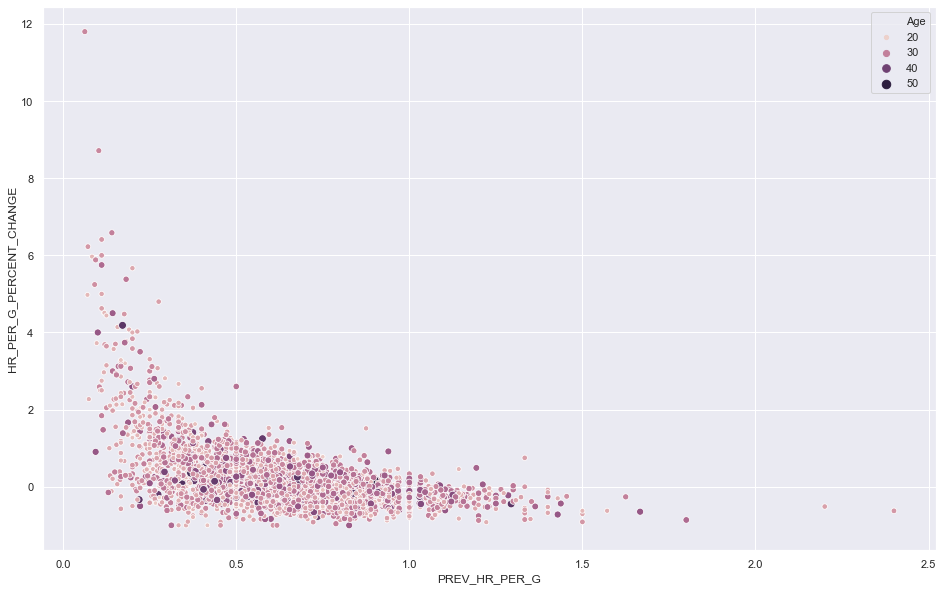

In [27]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_HR_PER_G", y="HR_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')

In [28]:
mod_wpg = sm.ols(formula="W_PER_G_PERCENT_CHANGE ~ Age + PREV_W_PER_G", data=df2[df2.PREV_W_PER_G > 0]).fit()
print(mod_wpg.summary())

mod_lpg = sm.ols(formula="L_PER_G_PERCENT_CHANGE ~ Age + PREV_L_PER_G", data=df2[df2.PREV_L_PER_G > 0]).fit()
print(mod_lpg.summary())

mod_kpg = sm.ols(formula="SO_PER_G_PERCENT_CHANGE ~ Age + PREV_SO_PER_G", data=df2[df2.PREV_SO_PER_G > 0]).fit()
print(mod_kpg.summary())

mod_era = sm.ols(formula="ERA_PERCENT_CHANGE ~ Age + PREV_ERA", data=df2[df2.PREV_ERA > 0]).fit()
print(mod_era.summary())

mod_whip = sm.ols(formula="WHIP_PERCENT_CHANGE ~ Age + PREV_WHIP", data=df2[df2.PREV_WHIP > 0]).fit()
print(mod_whip.summary())

mod_ip_per_g = sm.ols(formula="IP_PER_G_PERCENT_CHANGE ~ Age + PREV_IP_PER_G", data=df2[df2.PREV_IP_PER_G > 0]).fit()
print(mod_ip_per_g.summary())

mod_hrpg = sm.ols(formula="HR_PER_G_PERCENT_CHANGE ~ Age + PREV_HR_PER_G", data=df2[df2.PREV_HR_PER_G > 0]).fit()
print(mod_hrpg.summary())

                              OLS Regression Results                              
Dep. Variable:     W_PER_G_PERCENT_CHANGE   R-squared:                       0.206
Model:                                OLS   Adj. R-squared:                  0.205
Method:                     Least Squares   F-statistic:                     479.7
Date:                    Fri, 10 Apr 2020   Prob (F-statistic):          5.17e-186
Time:                            08:12:05   Log-Likelihood:                -4758.9
No. Observations:                    3711   AIC:                             9524.
Df Residuals:                        3708   BIC:                             9543.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercep

In [29]:
def determine_change_prob(stat, predicted, age, prev, data, mod):
    ## predicted_avg:  predicted batting average for upcoming season.  
    ##                 Probability of at least this batting average occuring will be returned.
    ##
    ## age:  integer value, age of player in current season
    ## prev_avg: float, previous season's batting average for player
    ## data: pandas dataframe of all observations that trained model
    ## mod: any linear regression statsmodel with a predict function that takes in a pandas dataframe
    
    percent_change = (predicted-prev)/prev
    prev_stat_name = 'PREV_{0}'.format(stat)
    
    ind = ['Age', prev_stat_name]
    row = [age, prev] 

    # create Pandas Series with defined indexes 
    x = pd.Series(row, index = ind) 

    avg_age = np.mean(data['Age'])
    # might need to change how to get previous season's batting average among all players
    avg_prev_avg = np.mean(data[prev_stat_name])
    
    model_mu = mod.predict(x)
    cov = np.cov(df2['Age'],data[prev_stat_name])[0][1]
    ## formula for model variance here https://link.springer.com/content/pdf/bbm%3A978-0-585-25657-3%2F1.pdf
    model_var = mod.params[1]**2 * np.var(data['Age']) + mod.params[2]**2 * np.var(data[prev_stat_name]) + 2*mod.params[1]*mod.params[2]*cov
    model_std = np.sqrt(model_var)
    
    if stat in ['ERA', 'WHIP', 'HR_PER_G', 'L_PER_G']:
        prob = scipy.stats.norm(model_mu, model_std).cdf(percent_change)[0]
    else:
        prob = 1-scipy.stats.norm(model_mu, model_std).cdf(percent_change)[0]
    
    return prob, percent_change, predicted


In [40]:
determine_change_prob('ERA', 3.5, 26, 2.5, df2[df2.PREV_ERA > 0], mod_era)

(0.4799863088343268, 0.4, 3.5)

In [41]:
df2020 = pd.read_csv('./pitching_data_starters_1996_2020.csv')
df2020.head()

,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,...,BB%,E-F,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,K-BB%,kwERA,TTO%,key_mlbam
0,1999,Pedro Martinez,Red Sox,27,23.0,4.0,2.07,11.6,31.0,29.0,...,0.044,0.67,10.0,-0.9,-0.7,-1.6,0.331,1.58,0.430,118377
1,1997,Roger Clemens,Blue Jays,34,21.0,7.0,2.05,10.7,34.0,34.0,...,0.065,-0.20,12.4,0.3,1.4,1.7,0.215,2.79,0.353,112388
2,2001,Randy Johnson,Diamondbacks,37,21.0,6.0,2.49,10.4,35.0,34.0,...,0.071,0.36,9.8,-1.0,0.5,-0.6,0.303,1.85,0.465,116615
3,2000,Randy Johnson,Diamondbacks,36,19.0,7.0,2.64,9.6,35.0,35.0,...,0.076,0.11,8.5,-1.5,0.5,-1.1,0.271,2.35,0.446,116615
4,1998,Kevin Brown,Padres,33,18.0,7.0,2.38,9.6,36.0,35.0,...,0.048,0.15,8.6,-0.7,-0.3,-1.0,0.202,3.00,0.304,111554


In [42]:
df2020 = df2020[(df2020.Season == 2020) | (df2020.Season == 2019)]

In [43]:
df2020['prob_W'] = float("NaN")
df2020['prob_L'] = float("NaN")
df2020['prob_ERA'] = float("NaN")
df2020['prob_WHIP'] = float("NaN")
df2020['prob_SO'] = float("NaN")
df2020['prob_IP'] = float("NaN")
df2020['prob_HR'] = float("NaN")

for i, r in df2020.iterrows():
    if r.Season == 2020:
        # look for previous season for player
        prev = df2020[(df2020.Season == 2019) & (df2020.key_mlbam == r.key_mlbam)]
        
        # get players age for 2020 season
        age = r.Age
        
        # get prob for W
        prev_wpg = prev.W.values[0] / prev.G.values[0]
        pred_wpg = r.W / prev.G.values[0]

        prob, _, _ = determine_change_prob('W_PER_G', pred_wpg, age, prev_wpg, df2, mod_wpg)
        
        df2020.at[i,'prob_W'] = prob
        
        # get prob for L
        prev_lpg = prev.L.values[0] / prev.G.values[0]
        pred_lpg = r.L / prev.G.values[0]

        prob, _, _ = determine_change_prob('L_PER_G', pred_lpg, age, prev_lpg, df2, mod_lpg)
        
        df2020.at[i,'prob_L'] = prob
        
        # get prob for ERA
        prev_era = prev.ERA.values[0]
        pred_era = r.ERA

        prob, _, _ = determine_change_prob('ERA', pred_era, age, prev_era, df2, mod_era)
        
        df2020.at[i,'prob_ERA'] = prob
        
        # get prob for WHIP
        prev_whip = prev.WHIP.values[0]
        pred_whip = r.WHIP

        prob, _, _ = determine_change_prob('WHIP', pred_whip, age, prev_whip, df2, mod_whip)
        
        df2020.at[i,'prob_WHIP'] = prob
        
        # get prob for SO
        prev_kpg = prev.SO.values[0] / prev.G.values[0]
        pred_kpg = r.SO / prev.G.values[0]

        prob, _, _ = determine_change_prob('SO_PER_G', pred_kpg, age, prev_kpg, df2, mod_kpg)
        
        df2020.at[i,'prob_SO'] = prob
        
#         if pd.isnull(prob):
#             df2020.at[i,'prob_SB'] = 0
#         else:
#             df2020.at[i,'prob_SB'] = prob
        
        # get prob for IP
        prev_ippg = prev.IP.values[0] / prev.G.values[0]
        pred_ippg = r.IP / prev.G.values[0]

        prob, _, _ = determine_change_prob('IP_PER_G', pred_ippg, age, prev_ippg, df2, mod_ip_per_g)
        
        df2020.at[i,'prob_IP'] = prob
        
        # get prob for HR
        prev_hrpg = prev.HR.values[0] / prev.G.values[0]
        pred_hrpg = r.HR / prev.G.values[0]

        prob, _, _ = determine_change_prob('HR_PER_G', pred_hrpg, age, prev_hrpg, df2, mod_hrpg)
        
        df2020.at[i,'prob_HR'] = prob

/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [44]:
sub = df2020[(df2020.Season == 2020)]
rows_per_grp = np.floor(len(sub)/3)

sub.loc[:,'prob_W_rank'] = sub.prob_W.rank(ascending=False)
sub.loc[:,'prob_L_rank'] = sub.prob_L.rank(ascending=False)
sub.loc[:,'prob_ERA_rank'] = sub.prob_ERA.rank(ascending=False)
sub.loc[:,'prob_WHIP_rank'] = sub.prob_WHIP.rank(ascending=False)
sub.loc[:,'prob_SO_rank'] = sub.prob_SO.rank(ascending=False)
sub.loc[:,'prob_IP_rank'] = sub.prob_IP.rank(ascending=False)
sub.loc[:,'prob_HR_rank'] = sub.prob_HR.rank(ascending=False)

sub.loc[sub.prob_W_rank <= rows_per_grp, "prob_W_rank_grp"] = 1
sub.loc[(sub.prob_W_rank > rows_per_grp) & (sub.prob_W_rank <= rows_per_grp*2), "prob_W_rank_grp"] = 2
sub.loc[sub.prob_W_rank > rows_per_grp*2, "prob_W_rank_grp"] = 3

sub.loc[sub.prob_L_rank <= rows_per_grp, "prob_L_rank_grp"] = 1
sub.loc[(sub.prob_L_rank > rows_per_grp) & (sub.prob_L_rank <= rows_per_grp*2), "prob_L_rank_grp"] = 2
sub.loc[sub.prob_L_rank > rows_per_grp*2, "prob_L_rank_grp"] = 3

sub.loc[sub.prob_ERA_rank <= rows_per_grp, "prob_ERA_rank_grp"] = 1
sub.loc[(sub.prob_ERA_rank > rows_per_grp) & (sub.prob_ERA_rank <= rows_per_grp*2), "prob_ERA_rank_grp"] = 2
sub.loc[sub.prob_ERA_rank > rows_per_grp*2, "prob_ERA_rank_grp"] = 3

sub.loc[sub.prob_WHIP_rank <= rows_per_grp, "prob_WHIP_rank_grp"] = 1
sub.loc[(sub.prob_WHIP_rank > rows_per_grp) & (sub.prob_WHIP_rank <= rows_per_grp*2), "prob_WHIP_rank_grp"] = 2
sub.loc[sub.prob_WHIP_rank > rows_per_grp*2, "prob_WHIP_rank_grp"] = 3

sub.loc[sub.prob_SO_rank <= rows_per_grp, "prob_SO_rank_grp"] = 1
sub.loc[(sub.prob_SO_rank > rows_per_grp) & (sub.prob_SO_rank <= rows_per_grp*2), "prob_SO_rank_grp"] = 2
sub.loc[sub.prob_SO_rank > rows_per_grp*2, "prob_SO_rank_grp"] = 3

sub.loc[sub.prob_IP_rank <= rows_per_grp, "prob_IP_rank_grp"] = 1
sub.loc[(sub.prob_IP_rank > rows_per_grp) & (sub.prob_IP_rank <= rows_per_grp*2), "prob_IP_rank_grp"] = 2
sub.loc[sub.prob_IP_rank > rows_per_grp*2, "prob_IP_rank_grp"] = 3

sub.loc[sub.prob_HR_rank <= rows_per_grp, "prob_HR_rank_grp"] = 1
sub.loc[(sub.prob_HR_rank > rows_per_grp) & (sub.prob_HR_rank <= rows_per_grp*2), "prob_HR_rank_grp"] = 2
sub.loc[sub.prob_HR_rank > rows_per_grp*2, "prob_HR_rank_grp"] = 3

/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [45]:
inj = pd.read_csv('./2019_injury_mlb_api.csv')
inj.head()

inj['days_injured'] = pd.to_datetime(inj.injury_end_date) - pd.to_datetime(inj.injury_start_date)
inj.days_injured = inj.days_injured / np.timedelta64(1, 'D')

inj.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,playerid,injury_start_date,injury_end_date,days_injured
0,0,0,0,0,456501,2019-02-13T00:00:00,2019-09-10T00:00:00,209.0
1,1,1,1,1,534910,2019-02-13T00:00:00,2019-09-03T00:00:00,202.0
2,2,2,2,2,640455,2019-02-13T00:00:00,2019-09-01T00:00:00,200.0
3,3,3,3,3,608665,2019-02-13T00:00:00,2019-11-04T00:00:00,264.0
4,4,4,4,4,592836,2019-02-13T00:00:00,2019-09-29T00:00:00,228.0


In [46]:
for i, r in sub.iterrows():
    prev = inj[(inj.playerid == r.key_mlbam)]
    if len(prev) > 0:
        sub.at[i,'prev_season_days_injured'] = prev.days_injured.values[0]
    else:
        sub.at[i,'prev_season_days_injured'] = 0

/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [47]:
sub.head()

,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,...,prob_IP_rank,prob_HR_rank,prob_W_rank_grp,prob_L_rank_grp,prob_ERA_rank_grp,prob_WHIP_rank_grp,prob_SO_rank_grp,prob_IP_rank_grp,prob_HR_rank_grp,prev_season_days_injured
5993,2020,Jacob deGrom,NaN,32,14.897299,5.394423,2.948738,NaN,NaN,NaN,...,80.0,164.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,6.0
5994,2020,Max Scherzer,NaN,35,16.187217,7.066820,3.096919,NaN,NaN,NaN,...,139.0,74.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,12.0
5995,2020,Justin Verlander,NaN,37,15.394091,5.519765,2.750486,NaN,NaN,NaN,...,125.0,67.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,0.0
5996,2020,Chris Sale,NaN,31,10.871037,7.562075,3.160881,NaN,NaN,NaN,...,138.0,54.0,3.0,1.0,3.0,3.0,3.0,3.0,1.0,75.0
5997,2020,Gerrit Cole,NaN,29,15.470528,6.448947,2.765395,NaN,NaN,NaN,...,120.0,86.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,0.0


In [58]:
risk_features = sub.loc[:, ['key_mlbam'
                            ,'prob_W_rank_grp'
                            ,'prob_L_rank_grp'
                            ,'prob_ERA_rank_grp'
                            ,'prob_WHIP_rank_grp'
                            ,'prob_IP_rank_grp'
                            ,'prob_HR_rank_grp'
                            ,'prob_SO_rank_grp'
                            ,'prev_season_days_injured']]

risk_features.reset_index(inplace=True,drop=True)
risk_features.head()

,key_mlbam,prob_W_rank_grp,prob_L_rank_grp,prob_ERA_rank_grp,prob_WHIP_rank_grp,prob_IP_rank_grp,prob_HR_rank_grp,prob_SO_rank_grp,prev_season_days_injured
0,594798,3.0,3.0,3.0,3.0,2.0,3.0,3.0,6.0
1,453286,3.0,3.0,3.0,3.0,3.0,2.0,3.0,12.0
2,434378,3.0,3.0,3.0,3.0,3.0,2.0,3.0,0.0
3,519242,3.0,1.0,3.0,3.0,3.0,1.0,3.0,75.0
4,543037,3.0,3.0,3.0,3.0,2.0,2.0,3.0,0.0


In [76]:
from sklearn.cluster import KMeans
from collections import Counter, defaultdict


kmeans = KMeans(n_clusters=3, random_state=2020).fit(risk_features.iloc[:,1:])

print(Counter(kmeans.labels_))

risk_features['overall_risk'] = 0

for i,v in enumerate(kmeans.labels_):
    
    ## re-encode such that
    ## 0 = low
    ## 1 = medium
    ## 2 = high
    
    if v == 0:
        risk = 1
    elif v == 1:
        risk = 0
    else:
        risk = v
    
    risk_features.iloc[i,9] = risk

Counter({1: 151, 0: 25, 2: 7})


In [77]:
for i,r in sub.iterrows():
    risk = risk_features[risk_features.key_mlbam == r.key_mlbam]
    risk = risk.overall_risk.values[0]
    
    sub.at[i,'overall_risk'] = risk

In [78]:
## risk encoding
## 0 = low
## 1 = high
## 2 = medium

sub.head()

,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,...,prob_HR_rank,prob_W_rank_grp,prob_L_rank_grp,prob_ERA_rank_grp,prob_WHIP_rank_grp,prob_SO_rank_grp,prob_IP_rank_grp,prob_HR_rank_grp,prev_season_days_injured,overall_risk
5993,2020,Jacob deGrom,NaN,32,14.897299,5.394423,2.948738,NaN,NaN,NaN,...,164.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,6.0,0.0
5994,2020,Max Scherzer,NaN,35,16.187217,7.066820,3.096919,NaN,NaN,NaN,...,74.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,12.0,0.0
5995,2020,Justin Verlander,NaN,37,15.394091,5.519765,2.750486,NaN,NaN,NaN,...,67.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,0.0,0.0
5996,2020,Chris Sale,NaN,31,10.871037,7.562075,3.160881,NaN,NaN,NaN,...,54.0,3.0,1.0,3.0,3.0,3.0,3.0,1.0,75.0,1.0
5997,2020,Gerrit Cole,NaN,29,15.470528,6.448947,2.765395,NaN,NaN,NaN,...,86.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,0.0,0.0


In [80]:
sub[sub.overall_risk == 0].Name.unique()

array(['Jacob deGrom', 'Max Scherzer', 'Justin Verlander', 'Gerrit Cole',
       'Patrick Corbin', 'Trevor Bauer', 'Aaron Nola', 'Blake Snell',
       'Miles Mikolas', 'Noah Syndergaard', 'Zack Wheeler',
       'Kyle Freeland', 'German Marquez', 'James Paxton',
       'Kyle Hendricks', 'Marco Gonzales', 'Dallas Keuchel',
       'Clayton Kershaw', 'Jose Berrios', 'Walker Buehler', 'J.A. Happ',
       'Charlie Morton', 'Zack Greinke', 'Lance Lynn', 'Nick Pivetta',
       'Trevor Williams', 'Shane Bieber', 'Kyle Gibson', 'Brad Keller',
       'Vince Velasquez', 'Jake Odorizzi', 'Chris Archer', 'Mike Minor',
       'Anibal Sanchez', 'Rick Porcello', 'David Price', 'Jhoulys Chacin',
       'Zack Godley', 'Masahiro Tanaka', 'Stephen Strasburg',
       'Kevin Gausman', 'Alex Wood', 'Kenta Maeda', 'Tyler Skaggs',
       'Jack Flaherty', 'Reynaldo Lopez', 'Zach Eflin', 'Mike Leake',
       'CC Sabathia', 'Cole Hamels', 'Tanner Roark', 'Derek Holland',
       'Nathan Eovaldi', 'Joe Musgrove', 'E

In [81]:
## map back to original 2020 predictions dataframe and output csv

data = pd.read_csv('./pitching_data_starters_1996_2020.csv')

for i,r in data[data.Season==2020].iterrows():
    risk = risk_features[risk_features.key_mlbam == r.key_mlbam]
    risk = risk.overall_risk.values[0]
    
    data.at[i,'overall_risk'] = risk
    
data.tail()

,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,...,E-F,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,K-BB%,kwERA,TTO%,key_mlbam,overall_risk
6171,2020,Jefry Rodriguez,NaN,26,3.411383,5.519254,5.104923,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,622446,1.0
6172,2020,Andrew Kittredge,NaN,30,8.037384,6.456000,3.770127,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,552640,0.0
6173,2020,Drew Pomeranz,NaN,31,7.514943,7.206738,4.358391,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,519141,0.0
6174,2020,Ryan Carpenter,NaN,29,3.981786,7.469287,5.725440,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,502264,0.0
6175,2020,Elieser Hernandez,NaN,25,5.877094,7.167875,4.419089,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,622694,0.0


In [82]:
data.to_csv("./pitching_data_starters_1996_2020_with_risk.csv")